## Universidad del Valle de Guatemala
##### Integrantes
* Juan Manuel Marroquin Alfaro 19845
* Carlos Alberto Raxtúm Ramos 19721
* Jose Abraham Gutierrez Corado 19111
* Walter Danilo Saldaña Salguero 19897
* Javier Alejandro Cotto Argueta 19324

import libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import norm
import seaborn as sns
import scipy.stats as stats
from pandas_profiling import ProfileReport
%matplotlib inline

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
train = pd.read_csv('./videos/train.csv',low_memory=False)
# convert Nan to empty list
train[['event_attributes']] = train[['event_attributes']].fillna('')

In [5]:
train.head()

,video_id,time,event,event_attributes
0,1606b0e6_0,200.265822,start,
1,1606b0e6_0,201.150000,challenge,['ball_action_forced']
2,1606b0e6_0,202.765822,end,
3,1606b0e6_0,210.124111,start,
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed']


#### Pequena informacion de los datos antes de manipularlos

In [6]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
time,11218.0,1787.796418,860.84597,175.025822,1050.63525,1769.089449,2527.93275,3575.000727


In [7]:
train.describe(include=['O']).transpose()

,count,unique,top,freq
video_id,11218,12,1606b0e6_1,1249
event,11218,5,play,3586
event_attributes,11218,15,,6836


#### Pandas Profiler

In [ ]:
#profile = train.profile_report(title="EDA Detection Passes")
#profile.to_file(output_file="EDA.html")

In [8]:
df1 = pd.DataFrame([ x.replace('[','').replace(']','').replace("'",'').split(',') for x in train['event_attributes'].tolist() ])

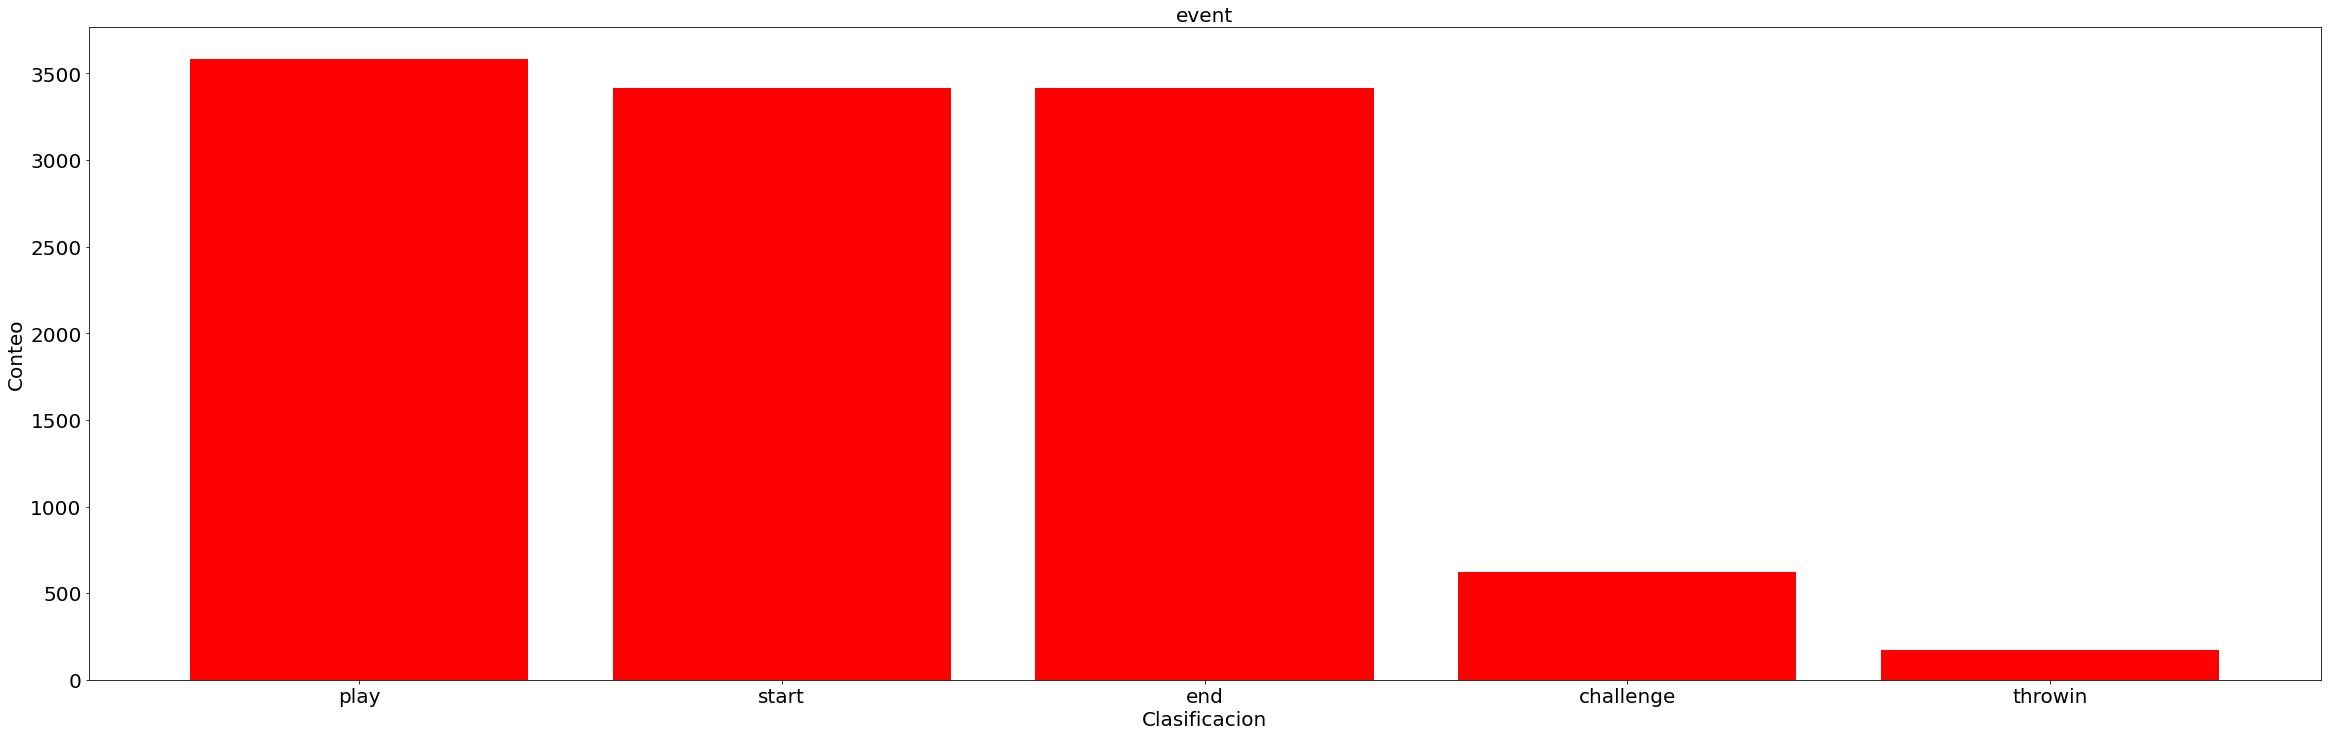

In [17]:
columnas = []

for col in train.columns:
    columnas.append(col)

for columna in columnas:
    count = train[columna].value_counts().sort_values(ascending=False).reset_index()
    count = count.rename(columns={"index": columna, columna: "Count"})
    
    if columna == 'event':  
        plt.figure(figsize=(40,12))
        plt.bar(count[columna], count['Count'], color='r')
        plt.title(columna, size=20)
        plt.xlabel('Clasificacion', size=20)
        plt.ylabel('Conteo', size=20)
        plt.xticks(size=20)
        plt.yticks(size=20)
        plt.show()